In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

## Load Appian Stock Data

In [2]:
appn = pdr.get_data_yahoo('APPN','2019-05-31')
appn.drop('Adj Close', axis=1, inplace=True)
appn.head()

High        Low       Open      Close  Volume
Date                                                          
2019-05-31  36.520000  35.436001  35.520000  36.130001  331800
2019-06-03  36.570000  32.650002  36.000000  33.299999  677900
2019-06-04  34.560001  33.459999  33.919998  34.360001  507700
2019-06-05  34.790001  33.040001  34.540001  34.730000  445500
2019-06-06  34.480000  33.150002  34.060001  34.220001  326800

In [3]:
appn['3-day'] = appn['Close'].rolling(3).mean()
appn['9-day'] = appn['Close'].rolling(9).mean()
appn['21-day'] = appn['Close'].rolling(21).mean()
appn['Change'] = np.log(appn.Close / appn.Close.shift())
appn.tail()

High        Low       Open      Close   Volume      3-day  \
Date                                                                         
2021-05-28  97.760002  89.169998  89.250000  90.480003  1281400  88.220001   
2021-06-01  92.139999  84.900002  90.220001  87.580002   982000  88.806669   
2021-06-02  94.084999  86.919998  86.919998  93.970001   834300  90.676669   
2021-06-03  94.540001  89.040001  92.860001  91.410004  1166500  90.986669   
2021-06-04  93.989998  90.180000  92.449997  90.959999   570700  92.113335   

                9-day     21-day    Change  
Date                                        
2021-05-28  84.880000  90.346190  0.023709  
2021-06-01  85.348889  88.746190 -0.032576  
2021-06-02  86.631111  87.721428  0.070423  
2021-06-03  87.454445  87.013333 -0.027621  
2021-06-04  88.414445  86.472857 -0.004935

In [4]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(appn['Close'],label='Close')
plt.plot(appn['3-day'],label='Moving Average 3 Days')
plt.plot(appn['9-day'],label='Moving Average 9 Days')
plt.plot(appn['21-day'],label='Moving Average 21 Days')
plt.legend(loc=2)

## Zoom in the changing period

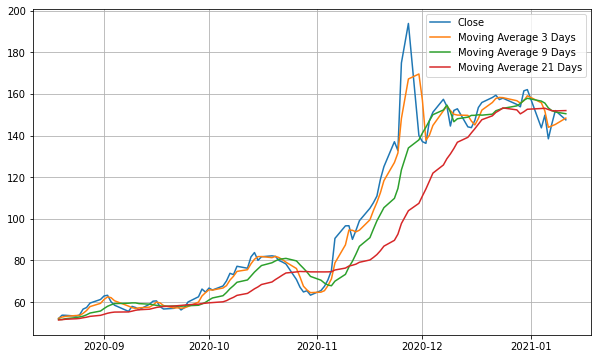

In [5]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(appn['Close'][-200:-100],label='Close')
plt.plot(appn['3-day'][-200:-100],label='Moving Average 3 Days')
plt.plot(appn['9-day'][-200:-100],label='Moving Average 9 Days')
plt.plot(appn['21-day'][-200:-100],label='Moving Average 21 Days')
plt.legend(loc=1)

In [6]:
# When the faster moving average is moving above the slower one, indicates time to buy
appn['position-9-21'] = np.where(appn['9-day'] > appn['21-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
appn['position-9-21'] = np.where(appn['9-day'] < appn['21-day'],-1,appn['position-9-21'])

<AxesSubplot:xlabel='Date'>

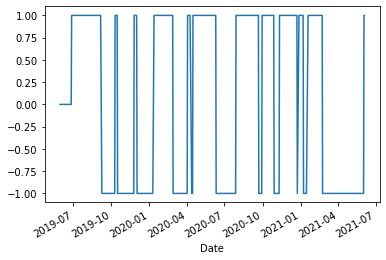

In [7]:
appn['position-9-21'].plot()

<AxesSubplot:xlabel='Date'>

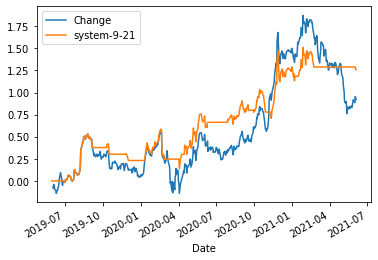

In [8]:
# Whether we are making money with this system
appn['system-9-21'] = np.where(appn['position-9-21'] > 0, appn['position-9-21']* appn['Change'],0)
appn[['Change','system-9-21']].cumsum().plot()

In [9]:
# When the faster moving average is moving above the slower one, indicates time to buy
appn['position-3-9'] = np.where(appn['3-day'] > appn['9-day'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
appn['position-3-9'] = np.where(appn['3-day'] < appn['9-day'],-1,appn['position-3-9'])
appn['position-3-9'].plot()

<AxesSubplot:xlabel='Date'>

<AxesSubplot:xlabel='Date'>

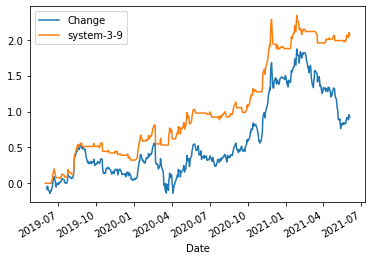

In [10]:
# Whether we are making money with this system
appn['system-3-9'] = np.where(appn['position-3-9'] > 0, appn['position-3-9']* appn['Change'],0)
appn[['Change','system-3-9']].cumsum().plot()

## Prepare data for DGIM processing

In [11]:
bit_depth = 16
num_buckets = 5
appn_list = appn['Close'].tolist()
appn_3day_list = appn['3-day'].tolist()
appn_9day_list = appn['9-day'].tolist()
appn_21day_list = appn['21-day'].tolist()
appn_list_bin = [ np.array(list(np.binary_repr(round(elem)).zfill(bit_depth))).astype(np.int8) for elem in appn_list ]
print(appn_list[0],appn_list_bin[0], len(appn_list_bin))

36.130001068115234 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0] 508


In [12]:
from ipynb.fs.full.DGIMMovingAverage import *

## 3, 9, 21 day moving average with DGIM

0 nan 12.0 nan
1 nan 23.0 nan
2 34.596666971842446 23.666666666666668 -31.592639585979455
3 34.12999979654948 23.333333333333332 -31.63394822026246
4 34.436667124430336 23.0 -33.21072589024402
5 33.90999984741211 23.333333333333332 -31.19040566697599
6 33.09000015258789 22.333333333333332 -32.50730362542263
7 32.13666661580404 32.0 -0.42526693087959994
8 31.89666748046875 31.666666666666668 -0.7210810155729224
9 32.006666819254555 32.0 -0.020829470598120205
10 32.38666661580404 21.666666666666668 -33.10004106414035
11 33.25999959309896 22.666666666666668 -31.85006932059698
12 34.65999984741211 24.0 -30.755914294119766
13 36.41333262125651 26.0 -28.597581906517565
14 37.79666646321615 26.0 -31.210864785381816
15 38.78000005086263 28.333333333333332 -26.93828443483182
16 38.45666758219401 28.0 -27.19077923183234
17 37.23666636149088 26.666666666666668 -28.385998875977286
18 35.43000030517578 24.666666666666668 -30.379151977982783
19 35.1933339436849 24.333333333333332 -30.858118266741503

327 59.96999867757162 41.333333333333336 -31.076647915965808
328 59.58333206176758 41.0 -31.188809720314072
329 58.326666514078774 40.0 -31.42073361873873
330 57.13666661580404 38.666666666666664 -32.32600192330534
331 57.21666717529297 38.666666666666664 -32.42062396223679
332 57.06666692097982 38.333333333333336 -32.827103103089094
333 57.1966667175293 38.333333333333336 -32.97977743590229
334 57.86333338419596 39.0 -32.59980419542862
335 59.97333272298177 41.333333333333336 -31.08047951203084
336 62.929999033610024 63.0 0.11123624259487085
337 64.5066655476888 64.66666666666667 0.2480381176416376
338 65.90333302815755 44.666666666666664 -32.22396407844411
339 65.75333404541016 44.666666666666664 -32.06935083197568
340 66.74000040690105 45.666666666666664 -31.575267623245864
341 67.88333384195964 46.666666666666664 -31.254604001459132
342 70.55666605631511 49.333333333333336 -30.07984065749688
343 72.37666575113933 51.0 -29.535300540979705
344 74.72333272298177 50.666666666666664 -32

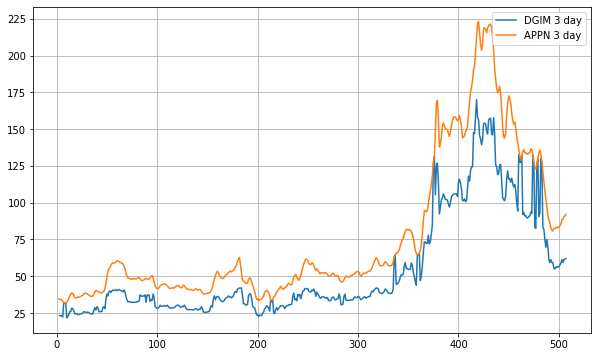

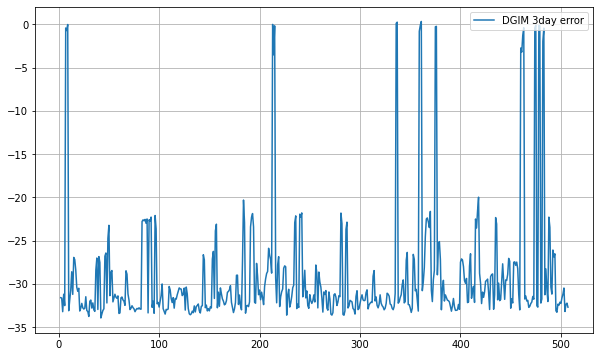

In [13]:
dgim_3day = DGIMMovingAverage(appn_list_bin, 3, num_buckets, bit_depth, appn_3day_list, False)
appn['3-day-dgim'] = dgim_3day.mov_avg
appn.tail()

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_3day.mov_avg)), dgim_3day.mov_avg, label = "DGIM 3 day")
plt.plot(range(len(dgim_3day.mov_avg)), appn_3day_list, label = "APPN 3 day")
plt.legend(loc=1)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_3day.error)), dgim_3day.error, label = "DGIM 3day error")
plt.legend(loc=1)

0 nan 4.0 nan
1 nan 7.666666666666667 nan
2 nan 7.888888888888889 nan
3 nan 11.777777777777779 nan
4 nan 15.333333333333334 nan
5 nan 18.88888888888889 nan
6 nan 18.88888888888889 nan
7 nan 22.333333333333332 nan
8 33.46777809990777 25.88888888888889 -22.64533124486016
9 33.075555589463974 25.555555555555557 -22.735823782515293
10 32.98666678534614 25.444444444444443 -22.864457297189606
11 33.02222230699327 25.555555555555557 -22.61103653783005
12 33.252222273084854 25.77777777777778 -22.478029991267892
13 33.64555528428819 25.77777777777778 -23.38429976866665
14 34.31777784559462 26.444444444444443 -22.94243361727711
15 35.1488889058431 27.333333333333332 -22.235569361654907
16 35.752222273084854 28.0 -21.683189967525223
17 36.097777472602 28.333333333333332 -21.50947975997091
18 36.29000006781684 28.444444444444443 -21.619056513394977
19 36.687778049045136 28.88888888888889 -21.257458409529455
20 36.842222425672745 29.0 -21.285964606217817
21 36.701111263699005 28.88888888888889 -21.

204 34.96444405449761 27.444444444444443 -21.507562363445736
205 34.69666629367404 26.77777777777778 -22.82319704397667
206 35.03777737087674 27.11111111111111 -22.623199456579233
207 35.69666629367404 27.77777777777778 -22.183832100028916
208 36.44222174750434 28.555555555555557 -21.641562489226892
209 36.984444088406036 29.11111111111111 -21.288228527850375
210 37.949999491373696 29.11111111111111 -23.290878784522057
211 37.98888863457574 29.22222222222222 -23.07692256196855
212 37.934444427490234 29.22222222222222 -22.96652115710033
213 37.78000005086263 29.0 -23.239809526316183
214 37.478889041476776 28.666666666666668 -23.51249623503483
215 37.165555742051865 28.444444444444443 -23.4655748406843
216 36.61777793036567 27.88888888888889 -23.837844715963115
217 36.383333418104385 27.666666666666668 -23.957856338419763
218 36.291111416286896 27.555555555555557 -24.070786260932625
219 36.3444446987576 27.666666666666668 -23.876490902576847
220 36.76777776082357 28.11111111111111 -23.54

480 129.8188908894857 101.33333333333333 -21.942536529912278
481 129.5822253757053 101.0 -22.057211390555445
482 128.66778140597873 100.11111111111111 -22.19411105315032
483 128.14667002360025 99.55555555555556 -22.3112426275136
484 127.61000315348308 99.0 -22.419874967852138
485 125.60889180501302 97.0 -22.77616766926308
486 123.22111341688368 94.55555555555556 -23.263511476597635
487 119.82889048258464 91.0 -24.05838055120313
488 114.47444491916232 92.77777777777777 -18.95328442667352
489 109.12444390190973 87.44444444444444 -19.867225602499385
490 103.93666500515408 82.55555555555556 -20.571286800993917
491 99.01110924614801 78.11111111111111 -21.108740518276743
492 94.1566645304362 72.77777777777777 -22.705654304213052
493 90.57555389404297 69.22222222222223 -23.575159912132893
494 87.82222069634332 70.11111111111111 -20.167002661513944
495 85.71666547987196 66.55555555555556 -22.354007609892186
496 83.88333214653863 64.77777777777777 -22.776341711586664
497 83.40888807508681 64.77

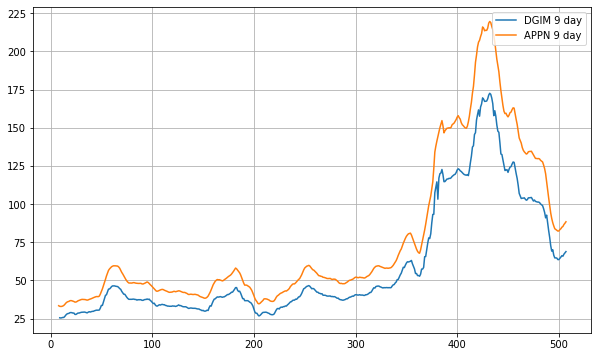

In [14]:
dgim_9day = DGIMMovingAverage(appn_list_bin, 9, num_buckets, bit_depth, appn_9day_list, False)
appn['9-day-dgim'] = dgim_9day.mov_avg
appn.tail()

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_9day.mov_avg)), dgim_9day.mov_avg, label = "DGIM 9 day")
plt.plot(range(len(dgim_9day.mov_avg)), appn_9day_list, label = "APPN 9 day")
plt.legend(loc=1)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_9day.error)), dgim_9day.error, label = "DGIM 9day error")
plt.legend(loc=1)

0 nan 1.7142857142857142 nan
1 nan 3.2857142857142856 nan
2 nan 3.380952380952381 nan
3 nan 5.0476190476190474 nan
4 nan 6.571428571428571 nan
5 nan 8.095238095238095 nan
6 nan 8.095238095238095 nan
7 nan 9.571428571428571 nan
8 nan 11.095238095238095 nan
9 nan 12.666666666666666 nan
10 nan 14.19047619047619 nan
11 nan 15.857142857142858 nan
12 nan 17.38095238095238 nan
13 nan 19.19047619047619 nan
14 nan 20.952380952380953 nan
15 nan 19.80952380952381 nan
16 nan 21.571428571428573 nan
17 nan 23.238095238095237 nan
18 nan 24.857142857142858 nan
19 nan 26.38095238095238 nan
20 34.88428588140579 28.095238095238095 -19.461621800853397
21 34.855714343843005 28.095238095238095 -19.39560377938172
22 34.96190479823521 28.238095238095237 -19.231817027541858
23 35.072857084728426 28.38095238095238 -19.080010184542008
24 35.14999989100865 28.428571428571427 -19.122129397663407
25 35.29428554716564 28.666666666666668 -18.77816416383364
26 35.54428554716564 28.80952380952381 -18.947523164321623
27

150 39.99095208304269 32.476190476190474 -18.791154537275176
151 39.87999961489723 32.38095238095238 -18.80403035697014
152 39.78571392240978 32.285714285714285 -18.850986691660278
153 39.74333299909319 32.23809523809524 -18.884268617252594
154 39.849047342936196 32.333333333333336 -18.86046094132066
155 39.99285688854399 32.523809523809526 -18.675953522275083
156 40.46047592163086 32.904761904761905 -18.67430830893796
157 40.88285700480143 33.333333333333336 -18.46623309760727
158 41.42238090151832 33.095238095238095 -20.103003799028365
159 41.98380951654343 33.666666666666664 -19.810357720395654
160 42.600952330089754 34.285714285714285 -19.518901784038945
161 43.0490475609189 35.142857142857146 -18.365540856330604
162 43.45714278448196 34.80952380952381 -19.899188996028784
163 43.782618931361604 35.142857142857146 -19.733314268041134
164 44.193571363176616 35.57142857142857 -19.50994799875411
165 44.651190439860024 36.04761904761905 -19.268403165709515
166 45.18690472557431 36.57142

320 55.17404774257115 44.61904761904762 -19.130371171552653
321 55.24785723005022 44.714285714285715 -19.066027252248116
322 55.61571430024647 45.095238095238095 -18.916373433977004
323 56.033809661865234 45.476190476190474 -18.841515951502274
324 56.293333507719495 45.714285714285715 -18.792718665315988
325 56.56047621227446 46.0 -18.671123228595942
326 56.98857134864444 46.42857142857143 -18.530030969664228
327 57.406190418061755 46.095238095238095 -19.70336690250898
328 57.6528570992606 46.333333333333336 -19.63393374666325
329 57.87047613234747 46.57142857142857 -19.524718502537336
330 58.02761895315988 46.714285714285715 -19.496462965344712
331 58.237142835344585 46.904761904761905 -19.45902628263035
332 58.377619062151226 47.04761904761905 -19.40812283294697
333 58.548095158168245 47.19047619047619 -19.398784771749344
334 58.71142850603376 47.333333333333336 -19.3796939747959
335 58.95761889503116 47.61904761904762 -19.231732028002803
336 59.278095063709074 47.904761904761905 -19

486 127.51857176281158 102.9047619047619 -19.302137341870573
487 126.01857212611607 101.42857142857143 -19.51299739607874
488 123.78523872012184 99.38095238095238 -19.71502142864344
489 121.54857199532645 97.14285714285714 -20.078981144597666
490 119.59952436174665 95.19047619047619 -20.408984317898824
491 116.97857157389323 92.57142857142857 -20.864627319412186
492 114.25809551420666 89.80952380952381 -21.397671293797256
493 111.67095293317523 87.19047619047619 -21.92197352999069
494 109.11238170805431 84.66666666666667 -22.40416225795128
495 107.08809589204334 82.61904761904762 -22.849456859951296
496 105.28381020682198 80.80952380952381 -23.246011280576106
497 103.36523873465401 78.9047619047619 -23.664122609617255
498 101.39000047956195 78.42857142857143 -22.64664063752426
499 99.22952379499164 76.28571428571429 -23.121958699186436
500 96.68666621616909 78.52380952380952 -18.78527557435025
501 94.32809448242188 76.19047619047619 -19.228225049458246
502 92.08523704892113 73.76190476

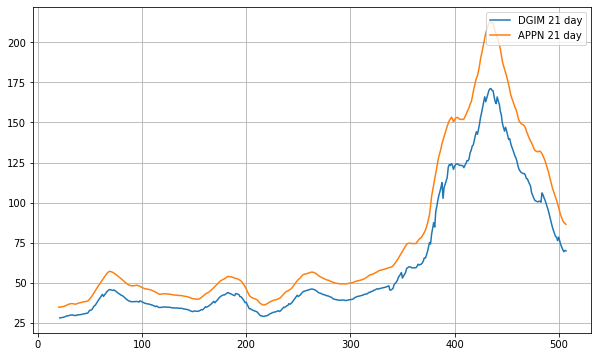

In [15]:
dgim_21day = DGIMMovingAverage(appn_list_bin, 21, num_buckets, bit_depth, appn_21day_list, False)
appn['21-day-dgim'] = dgim_21day.mov_avg
appn.tail()

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_21day.mov_avg)), dgim_21day.mov_avg, label = "DGIM 21 day")
plt.plot(range(len(dgim_21day.mov_avg)), appn_21day_list, label = "APPN 21 day")
plt.legend(loc=1)

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(range(len(dgim_21day.mov_avg)), dgim_21day.error, label = "DGIM 21day error")
plt.legend(loc=1)


In [16]:
appn.tail()

High        Low       Open      Close   Volume      3-day  \
Date                                                                         
2021-05-28  97.760002  89.169998  89.250000  90.480003  1281400  88.220001   
2021-06-01  92.139999  84.900002  90.220001  87.580002   982000  88.806669   
2021-06-02  94.084999  86.919998  86.919998  93.970001   834300  90.676669   
2021-06-03  94.540001  89.040001  92.860001  91.410004  1166500  90.986669   
2021-06-04  93.989998  90.180000  92.449997  90.959999   570700  92.113335   

                9-day     21-day    Change  position-9-21  system-9-21  \
Date                                                                     
2021-05-28  84.880000  90.346190  0.023709             -1     0.000000   
2021-06-01  85.348889  88.746190 -0.032576             -1     0.000000   
2021-06-02  86.631111  87.721428  0.070423             -1     0.000000   
2021-06-03  87.454445  87.013333 -0.027621              1    -0.027621   
2021-06-04  88.414445  86.472857 -0.004935              1    -0.004935   

            position-3-9  system-3-9  3-day-dgim  9-day-dgim  21-day-dgim  
Date                                                                       
2021-05-28             1    0.023709   61.333333   66.222222    72.190476  
2021-06-01             1   -0.032576   59.333333   65.888889    70.619048  
2021-06-02             1    0.070423   61.333333   67.222222    69.428571  
2021-06-03             1   -0.027621   61.666667   68.000000    70.238095  
2021-06-04             1   -0.004935   62.000000   68.888889    69.904762

## 9/21 DGIM Comparison

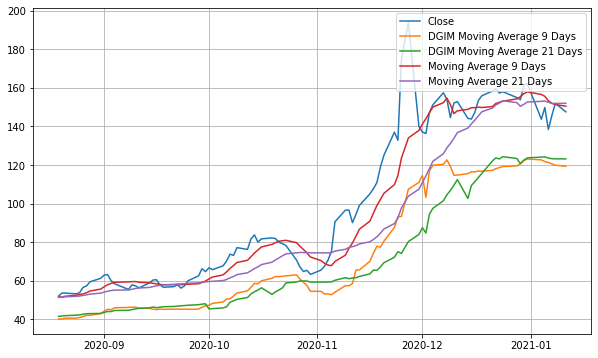

In [17]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(appn['Close'][-200:-100],label='Close')
plt.plot(appn['9-day-dgim'][-200:-100],label='DGIM Moving Average 9 Days')
plt.plot(appn['21-day-dgim'][-200:-100],label='DGIM Moving Average 21 Days')
plt.plot(appn['9-day'][-200:-100],label='Moving Average 9 Days')
plt.plot(appn['21-day'][-200:-100],label='Moving Average 21 Days')
plt.legend(loc=1)

<AxesSubplot:xlabel='Date'>

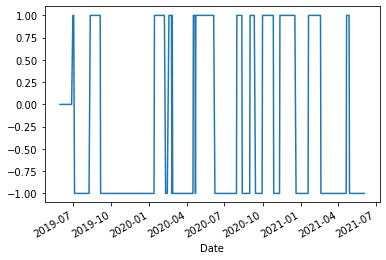

In [18]:
# When the faster moving average is moving above the slower one, indicates time to buy
appn['position-dgim-9-21'] = np.where(appn['9-day-dgim'] > appn['21-day-dgim'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
appn['position-dgim-9-21'] = np.where(appn['9-day-dgim'] < appn['21-day-dgim'],-1,appn['position-dgim-9-21'])
appn['position-dgim-9-21'].plot()

Change  system-dgim-9-21
Date                                  
2021-05-28  0.918005          0.805045
2021-06-01  0.885429          0.805045
2021-06-02  0.955852          0.805045
2021-06-03  0.928231          0.805045
2021-06-04  0.923296          0.805045

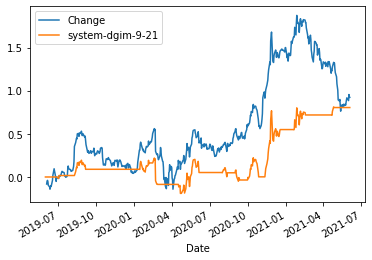

In [19]:
# Whether we are making money with this system
appn['system-dgim-9-21'] = np.where(appn['position-dgim-9-21'] > 0, appn['position-dgim-9-21']* appn['Change'],0)
appn[['Change','system-dgim-9-21']].cumsum().plot()
appn[['Change','system-dgim-9-21']].cumsum().tail()

In [20]:
appn[['system-9-21','system-dgim-9-21']].cumsum().plot()
appn[['system-9-21','system-dgim-9-21']].cumsum().tail()

system-9-21  system-dgim-9-21
Date                                     
2021-05-28     1.289346          0.805045
2021-06-01     1.289346          0.805045
2021-06-02     1.289346          0.805045
2021-06-03     1.261725          0.805045
2021-06-04     1.256790          0.805045

In [21]:
appn.tail()

High        Low       Open      Close   Volume      3-day  \
Date                                                                         
2021-05-28  97.760002  89.169998  89.250000  90.480003  1281400  88.220001   
2021-06-01  92.139999  84.900002  90.220001  87.580002   982000  88.806669   
2021-06-02  94.084999  86.919998  86.919998  93.970001   834300  90.676669   
2021-06-03  94.540001  89.040001  92.860001  91.410004  1166500  90.986669   
2021-06-04  93.989998  90.180000  92.449997  90.959999   570700  92.113335   

                9-day     21-day    Change  position-9-21  system-9-21  \
Date                                                                     
2021-05-28  84.880000  90.346190  0.023709             -1     0.000000   
2021-06-01  85.348889  88.746190 -0.032576             -1     0.000000   
2021-06-02  86.631111  87.721428  0.070423             -1     0.000000   
2021-06-03  87.454445  87.013333 -0.027621              1    -0.027621   
2021-06-04  88.414445  86.472857 -0.004935              1    -0.004935   

            position-3-9  system-3-9  3-day-dgim  9-day-dgim  21-day-dgim  \
Date                                                                        
2021-05-28             1    0.023709   61.333333   66.222222    72.190476   
2021-06-01             1   -0.032576   59.333333   65.888889    70.619048   
2021-06-02             1    0.070423   61.333333   67.222222    69.428571   
2021-06-03             1   -0.027621   61.666667   68.000000    70.238095   
2021-06-04             1   -0.004935   62.000000   68.888889    69.904762   

            position-dgim-9-21  system-dgim-9-21  
Date                                              
2021-05-28                  -1               0.0  
2021-06-01                  -1               0.0  
2021-06-02                  -1               0.0  
2021-06-03                  -1               0.0  
2021-06-04                  -1               0.0

## 3/9 DGIM comparison

In [22]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(appn['Close'][-200:-100],label='Close')
plt.plot(appn['3-day-dgim'][-200:-100],label='DGIM Moving Average 3 Days')
plt.plot(appn['9-day-dgim'][-200:-100],label='DGIM Moving Average 9 Days')
plt.plot(appn['3-day'][-200:-100],label='Moving Average 3 Days')
plt.plot(appn['9-day'][-200:-100],label='Moving Average 9 Days')
plt.legend(loc=1)

In [23]:
# When the faster moving average is moving above the slower one, indicates time to buy
appn['position-dgim-3-9'] = np.where(appn['3-day-dgim'] > appn['9-day-dgim'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
appn['position-dgim-3-9'] = np.where(appn['3-day-dgim'] < appn['9-day-dgim'],-1,appn['position-dgim-3-9'])
appn['position-dgim-3-9'].plot()

<AxesSubplot:xlabel='Date'>

Change  system-dgim-3-9
Date                                 
2021-05-28  0.918005         1.293011
2021-06-01  0.885429         1.293011
2021-06-02  0.955852         1.293011
2021-06-03  0.928231         1.293011
2021-06-04  0.923296         1.293011

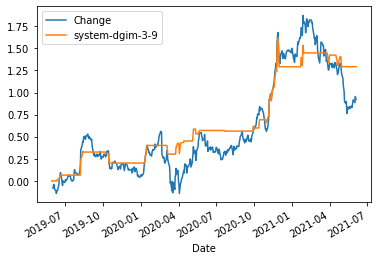

In [24]:
# Whether we are making money with this system
appn['system-dgim-3-9'] = np.where(appn['position-dgim-3-9'] > 0, appn['position-dgim-3-9']* appn['Change'],0)
appn[['Change','system-dgim-3-9']].cumsum().plot()
appn[['Change','system-dgim-3-9']].cumsum().tail()

system-3-9  system-dgim-3-9
Date                                   
2021-05-28    2.065431         1.293011
2021-06-01    2.032855         1.293011
2021-06-02    2.103277         1.293011
2021-06-03    2.075657         1.293011
2021-06-04    2.070722         1.293011

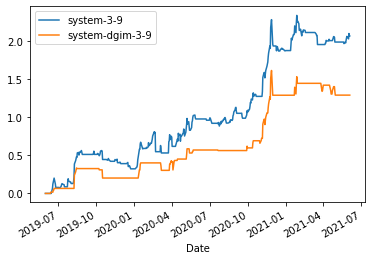

In [25]:
appn[['system-3-9','system-dgim-3-9']].cumsum().plot()
appn[['system-3-9','system-dgim-3-9']].cumsum().tail()

## Pandas 9/21 vs DGIM 3/9

In [26]:
appn[['system-9-21','system-dgim-3-9']].cumsum().plot()
appn[['system-9-21','system-dgim-3-9']].cumsum().tail()

system-9-21  system-dgim-3-9
Date                                    
2021-05-28     1.289346         1.293011
2021-06-01     1.289346         1.293011
2021-06-02     1.289346         1.293011
2021-06-03     1.261725         1.293011
2021-06-04     1.256790         1.293011

## Normalizing DGIM

<AxesSubplot:xlabel='Date'>

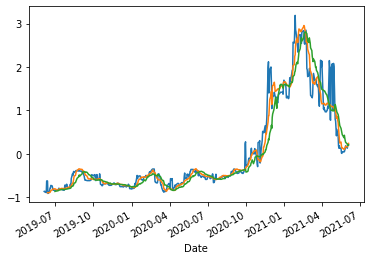

In [27]:
from sklearn import preprocessing

df3 = appn['3-day-dgim']
df9 = appn['9-day-dgim']
df21 = appn['21-day-dgim']

appn['3-day-dgim-norm']=(df3-df3.mean())/df3.std()
appn['9-day-dgim-norm']=(df9-df9.mean())/df9.std()
appn['21-day-dgim-norm']=(df21-df21.mean())/df21.std()

# normalized_df.plot()
appn['3-day-dgim-norm'].plot()
appn['9-day-dgim-norm'].plot()
appn['21-day-dgim-norm'].plot()

In [28]:
# When the faster moving average is moving above the slower one, indicates time to buy
appn['position-dgim-3-9-norm'] = np.where(appn['3-day-dgim-norm'] > appn['9-day-dgim-norm'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
appn['position-dgim-3-9-norm'] = np.where(appn['3-day-dgim-norm'] < appn['9-day-dgim-norm'],-1,appn['position-dgim-3-9-norm'])
appn['position-dgim-3-9-norm'].plot()

<AxesSubplot:xlabel='Date'>

Change  system-dgim-3-9-norm
Date                                      
2021-05-28  0.918005              2.090043
2021-06-01  0.885429              2.090043
2021-06-02  0.955852              2.090043
2021-06-03  0.928231              2.090043
2021-06-04  0.923296              2.090043

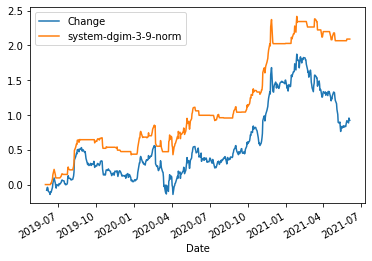

In [29]:
# Whether we are making money with this system
appn['system-dgim-3-9-norm'] = np.where(appn['position-dgim-3-9-norm'] > 0, appn['position-dgim-3-9-norm']* appn['Change'],0)
appn[['Change','system-dgim-3-9-norm']].cumsum().plot()
appn[['Change','system-dgim-3-9-norm']].cumsum().tail()

system-dgim-3-9-norm  system-dgim-3-9
Date                                             
2021-05-28              2.090043         1.293011
2021-06-01              2.090043         1.293011
2021-06-02              2.090043         1.293011
2021-06-03              2.090043         1.293011
2021-06-04              2.090043         1.293011

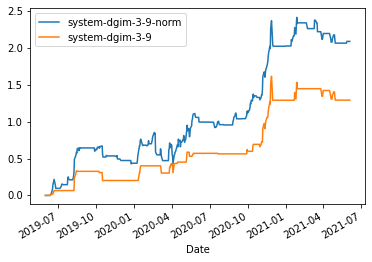

In [30]:
appn[['system-dgim-3-9-norm','system-dgim-3-9']].cumsum().plot()
appn[['system-dgim-3-9-norm','system-dgim-3-9']].cumsum().tail()

system-dgim-3-9-norm  system-3-9
Date                                        
2021-05-28              2.090043    2.065431
2021-06-01              2.090043    2.032855
2021-06-02              2.090043    2.103277
2021-06-03              2.090043    2.075657
2021-06-04              2.090043    2.070722

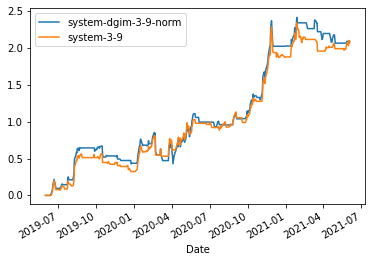

In [31]:
appn[['system-dgim-3-9-norm','system-3-9']].cumsum().plot()
appn[['system-dgim-3-9-norm','system-3-9']].cumsum().tail()

<AxesSubplot:xlabel='Date'>

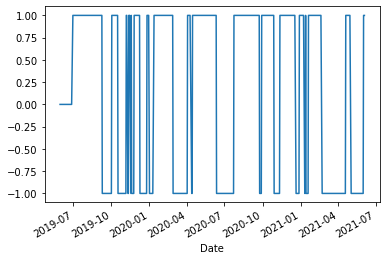

In [32]:
# When the faster moving average is moving above the slower one, indicates time to buy
appn['position-dgim-9-21-norm'] = np.where(appn['9-day-dgim-norm'] > appn['21-day-dgim-norm'], 1,0)
# When the faster moving average is moving below the slower one, indicates time to sell
appn['position-dgim-9-21-norm'] = np.where(appn['9-day-dgim-norm'] < appn['21-day-dgim-norm'],-1,appn['position-dgim-9-21-norm'])
appn['position-dgim-9-21-norm'].plot()

Change  system-dgim-9-21-norm
Date                                       
2021-05-28  0.918005               1.299395
2021-06-01  0.885429               1.299395
2021-06-02  0.955852               1.369818
2021-06-03  0.928231               1.342198
2021-06-04  0.923296               1.337263

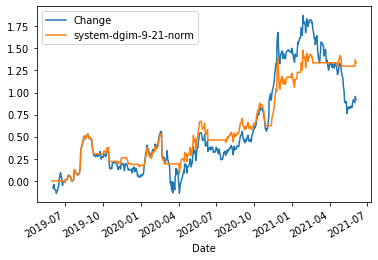

In [33]:
# Whether we are making money with this system
appn['system-dgim-9-21-norm'] = np.where(appn['position-dgim-9-21-norm'] > 0, appn['position-dgim-9-21-norm']* appn['Change'],0)
appn[['Change','system-dgim-9-21-norm']].cumsum().plot()
appn[['Change','system-dgim-9-21-norm']].cumsum().tail()

system-dgim-9-21-norm  system-dgim-9-21
Date                                               
2021-05-28               1.299395          0.805045
2021-06-01               1.299395          0.805045
2021-06-02               1.369818          0.805045
2021-06-03               1.342198          0.805045
2021-06-04               1.337263          0.805045

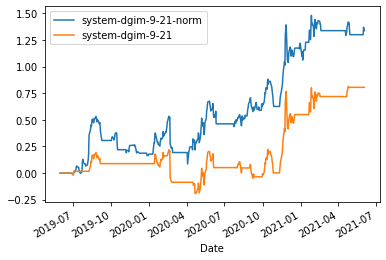

In [34]:
appn[['system-dgim-9-21-norm','system-dgim-9-21']].cumsum().plot()
appn[['system-dgim-9-21-norm','system-dgim-9-21']].cumsum().tail()

system-dgim-9-21-norm  system-9-21
Date                                          
2021-05-28               1.299395     1.289346
2021-06-01               1.299395     1.289346
2021-06-02               1.369818     1.289346
2021-06-03               1.342198     1.261725
2021-06-04               1.337263     1.256790

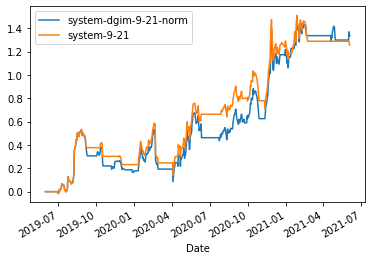

In [35]:
appn[['system-dgim-9-21-norm','system-9-21']].cumsum().plot()
appn[['system-dgim-9-21-norm','system-9-21']].cumsum().tail()

system-dgim-3-9-norm  system-dgim-9-21-norm
Date                                                   
2021-05-28              2.090043               1.299395
2021-06-01              2.090043               1.299395
2021-06-02              2.090043               1.369818
2021-06-03              2.090043               1.342198
2021-06-04              2.090043               1.337263

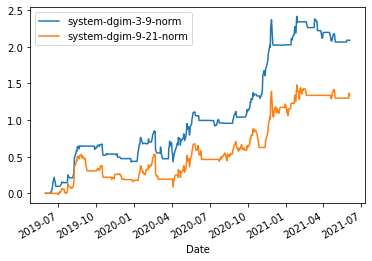

In [36]:
appn[['system-dgim-3-9-norm','system-dgim-9-21-norm']].cumsum().plot()
appn[['system-dgim-3-9-norm','system-dgim-9-21-norm']].cumsum().tail()